# 1 - Logistic Regression
Data file: breast_cancer_diagnosis.csv

# Jay Mudgal


### Import libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load data

In [2]:
# Read data from file (breast_cancer_diagnosis.csv) into dataframe
df= pd.read_csv(r"breast_cancer_diagnosis.csv")

### Examine data

In [3]:
# Review dataframe shape
df.shape

(569, 13)

In [4]:
# Display first 10 rows
df.head(10)

,id,name,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
0,ID842302,Glynnis Munson,NaN,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.2419,0.07871,35,1
1,ID842517,Lana Behrer,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.1812,0.05667,27,1
2,ID84300903,Devondra Vanvalkenburgh,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.2069,0.05999,31,1
3,ID84348301,Glory Maravalle,NaN,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.2597,0.09744,49,1
4,ID84358402,Mellie Mccurdy,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.1809,0.05883,20,1
5,ID843786,Merle Yelon,NaN,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.2087,0.07613,39,1
6,ID844359,Corrianne Banzett,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.1794,0.05742,38,1
7,ID84458202,Noni Marcellino,NaN,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.2196,0.07451,28,1
8,ID844981,Kacy Meltzer,NaN,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.2350,0.07389,50,1
9,ID84501001,Elka Ortolani,NaN,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.2030,0.08243,60,1


Note: NaN in radius column

### Prepare data

### Check for missing values

In [5]:
df.isnull().sum()

id                    0
name                  0
radius               71
texture               0
perimeter             0
area                  0
smoothness            0
compactness           0
concavity             0
symmetry              0
fractal_dimension     0
age                   0
diagnosis             0
dtype: int64

### Handle missing values
NOTES:
* You cannot drop the column with missing values
* You cannot drop the rows with missing values
* You cannot replace the missing values with 0  

Remember to use "inplace=True"

In [6]:
# Figure out strategy to replace values where radius is NaN
#df.fillna(df.median(), inplace=True)
df['radius'] = df['radius'].fillna(df['radius'].median())

In [7]:
# Replace values where radius is NaN based on above strategy
df.isnull().sum()

id                   0
name                 0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
concavity            0
symmetry             0
fractal_dimension    0
age                  0
diagnosis            0
dtype: int64

### Check for missing values again

In [8]:
df.isnull().sum()

id                   0
name                 0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
concavity            0
symmetry             0
fractal_dimension    0
age                  0
diagnosis            0
dtype: int64

### Drop non-numeric variables
Remember to use "inplace=True"

In [9]:
df= df._get_numeric_data()

### Review updated dataframe

In [10]:
# Display first 10 rows
df.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
0,13.465,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35,1
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27,1
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31,1
3,13.465,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49,1
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20,1


# Basic Visulization 

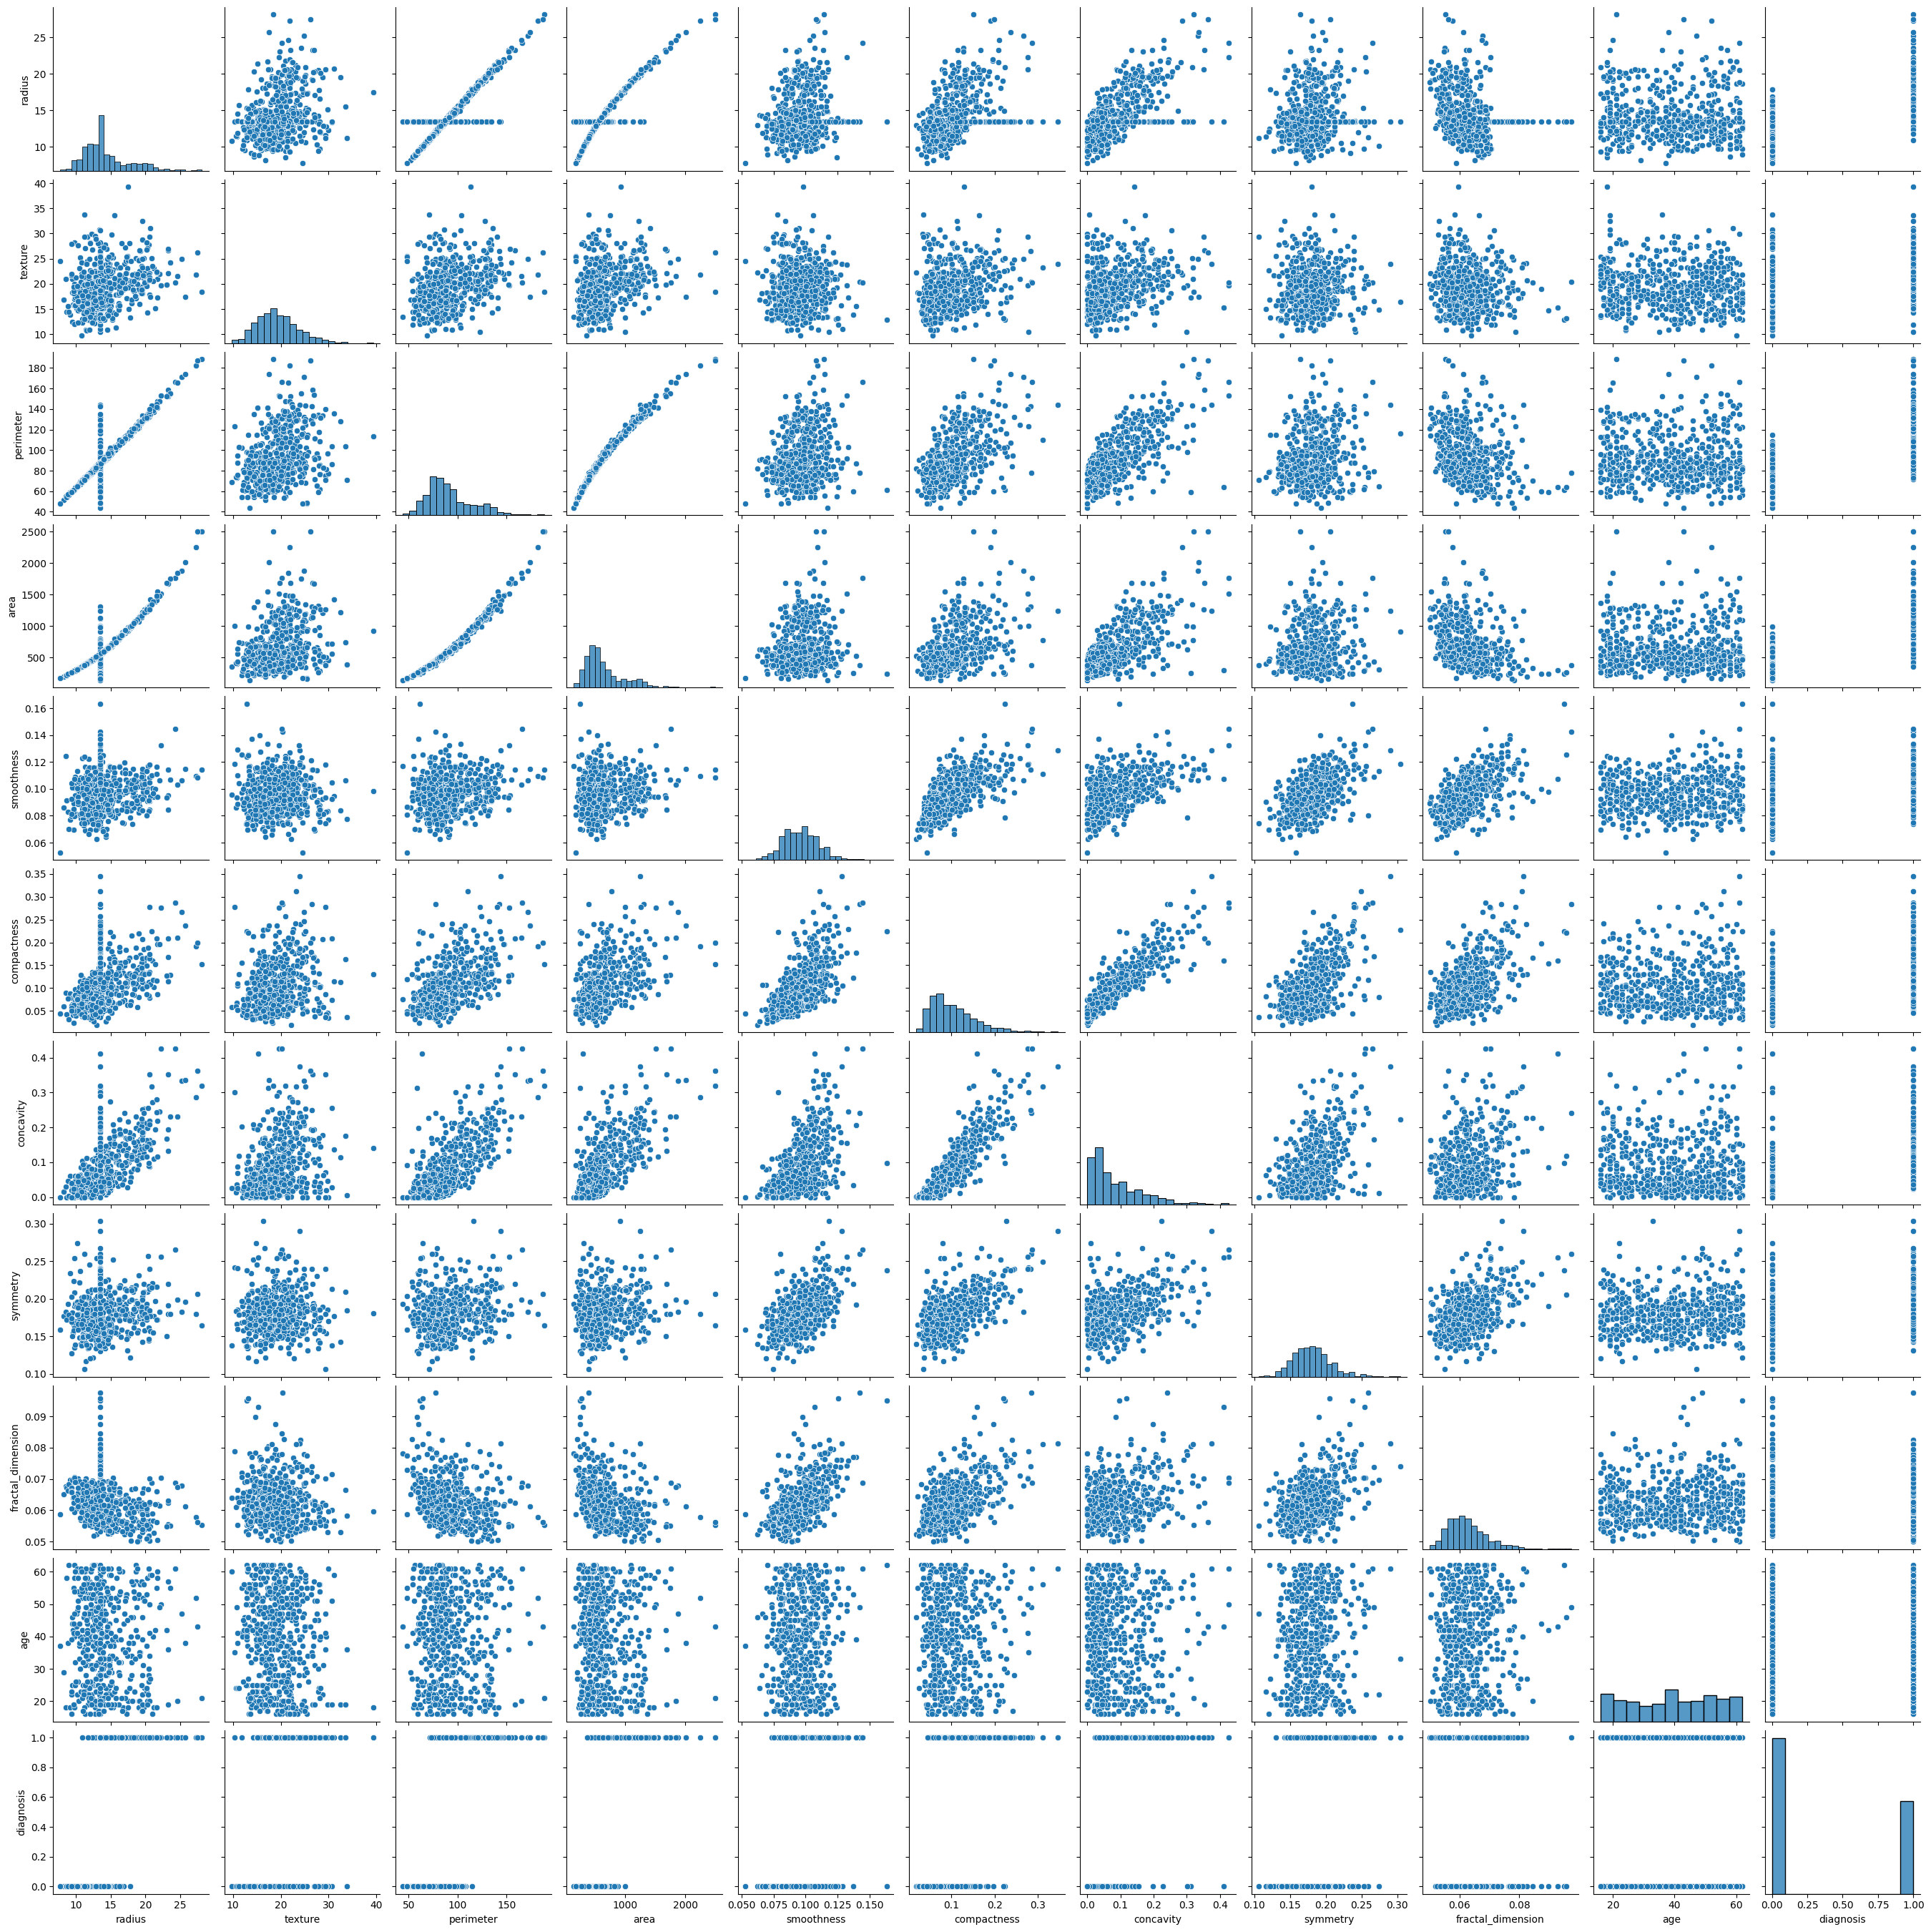

In [11]:
sns.pairplot(df)

<Axes: >

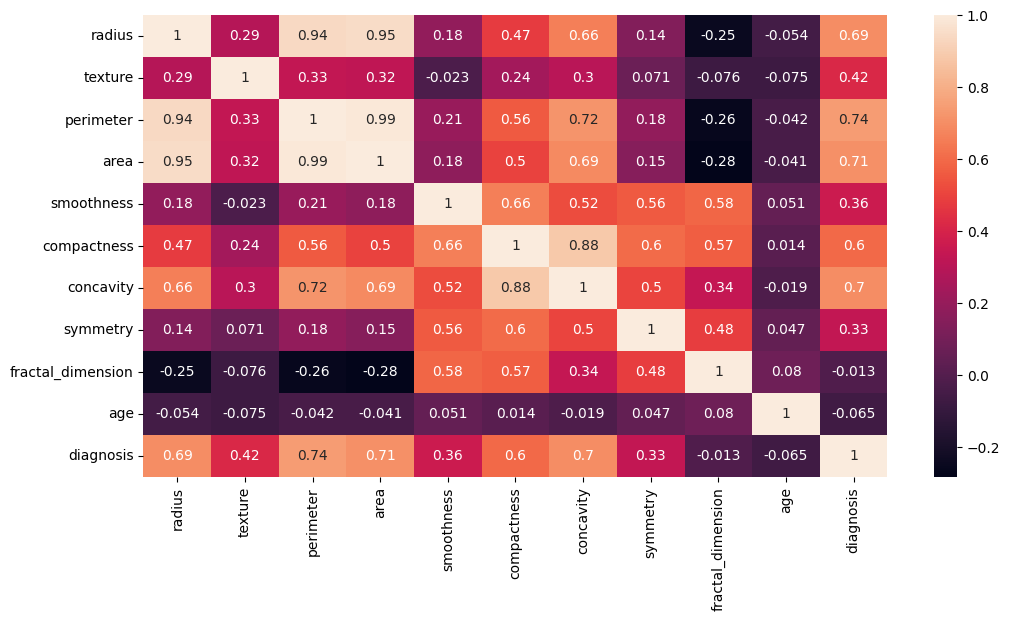

In [12]:
# Plot data as a color-encoded correlation matrix
plt.subplots(figsize=(12,6))
sns.heatmap(df.corr(),
            xticklabels=df.corr().columns,
            yticklabels=df.corr().columns,
            annot=True)

In [13]:
# Review distribution of targets (outcome)
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

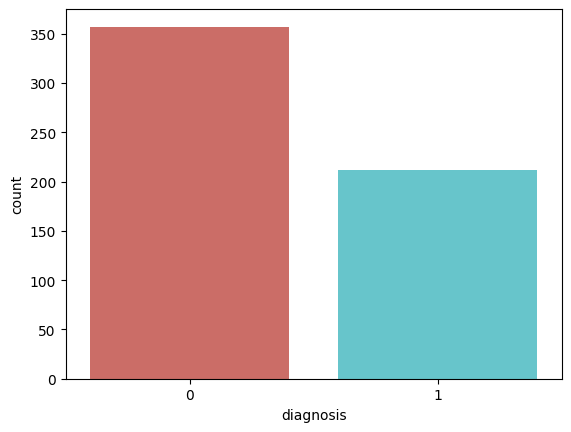

In [14]:
# Plot outcome counts
sns.countplot(x='diagnosis', data=df, palette='hls')
plt.show()

### Separate independent and dependent variables
* Independent variables: All remaining variables except Diagnosis
* Dependent variable: Diagnosis

In [15]:
# Prepare dataset for model training
y= df["diagnosis"]
x= df.drop("diagnosis", axis=1)

In [16]:
x.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age
0,13.465,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31
3,13.465,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20


### Split data into training and test sets

In [17]:
# Split data into training data and test data
xtrain,xtest,ytrain,ytest= train_test_split(x,y, test_size=0.3, random_state=42)

### Train LogisticRegression model

In [18]:
# Train model
model=LogisticRegression(max_iter=200)

### If above results in error, review error message, look up documentation for LogisticRegression, and change model hyperparameter appropriately

In [19]:
# Train model again
model.fit(xtrain,ytrain)

LogisticRegression(max_iter=200)

In [20]:
print(f"classes: {model.classes_}\n")
print(f"number of features: {model.n_features_in_}\n")
print(f"features: {model.feature_names_in_}\n")
print(f"intercept: {model.intercept_}\n")
print(f"coefficents: {model.coef_}\n")

classes: [0 1]

number of features: 10

features: ['radius' 'texture' 'perimeter' 'area' 'smoothness' 'compactness'
 'concavity' 'symmetry' 'fractal_dimension' 'age']

intercept: [-30.98784829]

coefficents: [[ 3.86599717e-01  2.35161010e-01  3.39173311e-01 -1.79725249e-02
   4.50482663e-01  9.54153088e-01  1.57065861e+00  6.49435590e-01
   1.53067671e-01 -1.06397964e-03]]



### Test model

In [21]:
# Generate predictions against the test set
predictions=model.predict(xtest)

### Model evaluation

In [22]:
# Print classification report
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       108
           1       0.91      0.94      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [23]:
# Print model accuracy
accuracy= model.score(xtest,ytest)
print(round(accuracy*100, 2),'%')

94.15 %


In [24]:
coeff = list(model.coef_[0])
#coeff

In [25]:
labels = list(xtrain.columns)
#labels

Text(0.5, 0, 'Importance')

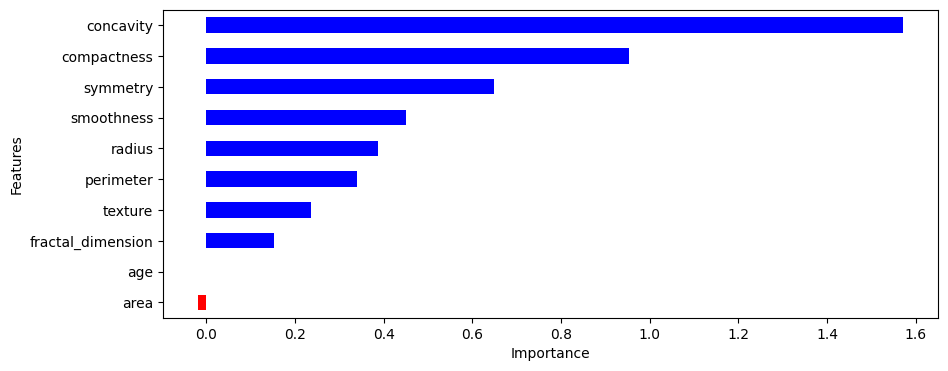

In [26]:
# Visualize how the model uses different features and which features have greater effect
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(10, 4),
                         color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')